# Bank Customer Churn model

# Here we are traing and testing the bank customer churn model and increasing the acccuracy of the model with oversampling and undersampling methods.

## Import library

In [209]:
import pandas as pd
import matplotlib.pyplot as mplot
import numpy as np
import seaborn as sns


## Importing Data

In [210]:
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

## Data Analysis

In [211]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [213]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Checking the duplicates

In [214]:
df.duplicated("CustomerId").sum()

0

In [215]:
df=df.set_index("CustomerId")

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [217]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Replacing the object type with int type.


In [218]:
df.replace({"Geography":{"France":2, "Germany":1, "Spain":0}}, inplace=True)

In [219]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [220]:
df.replace({"Gender":{"Male":1, "Female":0}}, inplace=True)

In [221]:
df["Num Of Products"].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [222]:
df.replace({"Num Of Products":{1:1,2:0,3:0,4:0}}, inplace=True)

In [223]:
df["Num Of Products"].value_counts()

1    5084
0    4916
Name: Num Of Products, dtype: int64

In [224]:
df["Has Credit Card"].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [225]:
df["Is Active Member"].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [226]:
df.loc[(df["Balance"]==0), "Churn"].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [227]:
df["zero Balance"]=np.where(df["Balance"]>0, 0,1)

In [228]:
df["zero Balance"].value_counts()

0    6383
1    3617
Name: zero Balance, dtype: int64

In [229]:
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

dropping surname from the data frame. It dsen't has any imapct on the target(Y) 

In [230]:
X=df.drop(["Surname","Churn"], axis=1)


In [231]:
Y=df["Churn"]


In [232]:
X.shape, Y.shape

((10000, 11), (10000,))

In [233]:
df["Churn"].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

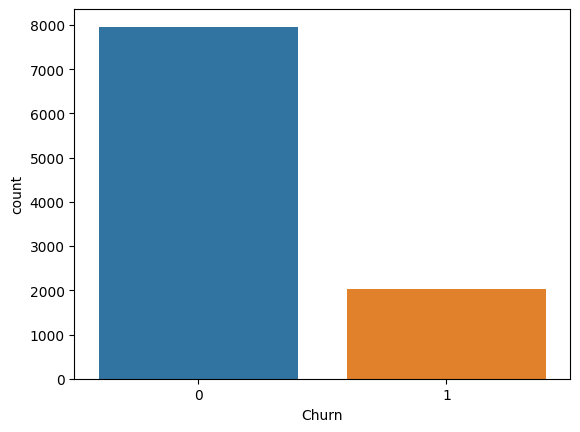

In [234]:
sns.countplot(x= "Churn",data =df);

using undersampling and over sampling methods

In [235]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=2365)
X_rus,Y_rus=rus.fit_resample(X,Y)


In [236]:
X.shape, Y.shape, X_rus.shape, Y_rus.shape

((10000, 11), (10000,), (4074, 11), (4074,))

In [237]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [238]:
Y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

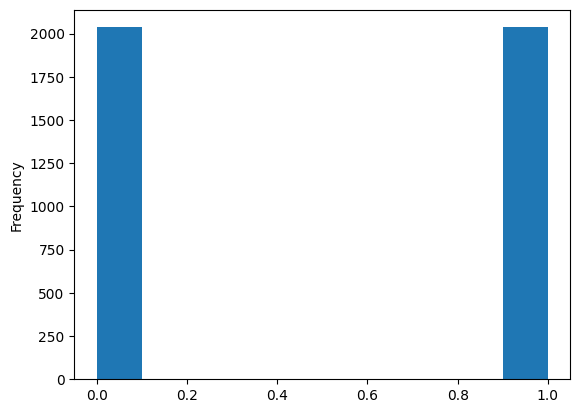

In [239]:
Y_rus.plot(kind="hist")

In [240]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2365)
X_ros, Y_ros =ros.fit_resample(X,Y)

In [241]:
X.shape, Y.shape, X_ros.shape, Y_ros.shape

((10000, 11), (10000,), (15926, 11), (15926,))

In [242]:
Y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

splitting the data to train and test the model

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=2536)
X_rus_train, X_rus_test, Y_rus_train, Y_rus_test=train_test_split(X_rus,Y_rus, test_size=0.3, random_state=2536)
X_ros_train, X_ros_test, Y_ros_train, Y_ros_test=train_test_split(X_ros,Y_ros, test_size=0.3, random_state=2536)


In [244]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]]=sc.fit_transform(X_train[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]])

feature variables, "CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"

In [245]:
X_test[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]]=sc.fit_transform(X_test[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]])

In [246]:
X_ros_train[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]]=sc.fit_transform(X_ros_train[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]])

In [247]:
X_ros_test[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]]=sc.fit_transform(X_ros_test[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]])

In [248]:
X_rus_train[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]]=sc.fit_transform(X_rus_train[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]])

In [249]:
X_rus_test[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]]=sc.fit_transform(X_rus_test[["CreditScore",	"Age", "Tenure", "Balance",	"Num Of Products",	"Has Credit Card",	"Is Active Member",	"Estimated Salary","zero Balance"]])

Selecting Support vector classification model and traning the model 

In [250]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
svc.fit(X_rus_train,Y_rus_train)
Y_rus_pred=svc.predict(X_rus_test)
svc.fit(X_ros_train,Y_ros_train)
Y_ros_pred=svc.predict(X_ros_test)


Model evaluation

In [251]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)


array([[2354,   48],
       [ 431,  167]])

In [252]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2402
           1       0.78      0.28      0.41       598

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.83      0.84      0.81      3000



In [253]:
print(classification_report(Y_rus_test,Y_rus_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       606
           1       0.74      0.71      0.72       617

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [254]:
print(classification_report(Y_ros_test,Y_ros_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2439
           1       0.75      0.76      0.75      2339

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



Selecting efficient model 

In [255]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.1,1,10],
            "gamma":[1,0.1,0.01],
            "kernel":["rbf"],
            "class_weight":["balanced"]}

In [256]:
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)

In [257]:
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [258]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [259]:
grid_predictions=grid.predict(X_test)

In [260]:
confusion_matrix(Y_test, grid_predictions)

array([[2182,  220],
       [ 410,  188]])

In [261]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2402
           1       0.46      0.31      0.37       598

    accuracy                           0.79      3000
   macro avg       0.65      0.61      0.62      3000
weighted avg       0.77      0.79      0.77      3000



In [262]:
grid_rus=GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)

In [263]:
grid_rus.fit(X_rus_train,Y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [264]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [265]:
grid_rus_predections=grid_rus.predict(X_rus_test)

In [266]:
confusion_matrix(Y_rus_test,grid_rus_predections)

array([[452, 154],
       [177, 440]])

In [267]:
print(classification_report(Y_rus_test,grid_rus_predections))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       606
           1       0.74      0.71      0.73       617

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [268]:
grid_ros=GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)

In [269]:
grid_ros.fit(X_ros_train,Y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [270]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [271]:
grid_ros_predections=grid_ros.predict(X_ros_test)

In [272]:
confusion_matrix(Y_ros_test, grid_ros_predections)

array([[2103,  336],
       [ 106, 2233]])

# Results

In [273]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2402
           1       0.46      0.31      0.37       598

    accuracy                           0.79      3000
   macro avg       0.65      0.61      0.62      3000
weighted avg       0.77      0.79      0.77      3000



In [274]:
print(classification_report(Y_rus_test,grid_rus_predections))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       606
           1       0.74      0.71      0.73       617

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [275]:
print(classification_report(Y_ros_test,grid_ros_predections))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2439
           1       0.87      0.95      0.91      2339

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



The model with oversampled data has achived and accuracy of 91 and it is much better than other selected methods.